In [1]:
from __future__ import division

import PerformParser as pp
import pandas as pd
import numpy as np
from scipy import signal as sig
import performFun as pF

import bokeh.plotting as bkP
import bokeh.models as bkM
from bokeh.palettes import Spectral6
bkP.output_notebook() 

import cv2
import os
import scipy.io as sio
import matplotlib

%matplotlib notebook
from ipywidgets import interact
import filterpy as fP
from bokeh.io import push_notebook

import Quaternion as qu

import plotly
from plotly.graph_objs import Scatter, Layout
import plotly.plotly as py
import plotly.graph_objs as go

print plotly.__version__

plotly.offline.init_notebook_mode()

import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D

bkP.output_notebook()

#bkP.output_file('timeSeries.html') 

#%pylab inline
#%matplotlib notebook


/Users/kamranbinaee/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading BokehJS ...

1.12.9


Loading BokehJS ...

In [2]:
# List of subjects with good calibration quality
fileTimeList = ['2016-4-19-14-4', '2016-4-22-11-57', '2016-4-27-13-28', '2016-4-28-10-57', '2016-4-29-11-56',
                '2016-5-3-12-52', '2016-5-4-13-3', '2016-5-5-13-7', '2016-5-6-11-2', '2016-5-6-13-4']

fileTime = '2016-4-22-11-57'
#fileTime = '2016-4-27-13-28'
#fileTime = '2016-4-28-10-57'
#fileTime = '2016-4-29-11-56'
#fileTime = '2016-5-3-12-52'
#fileTime = '2016-5-4-13-3'
#fileTime = '2016-5-5-13-7'
#fileTime = '2016-5-6-11-2'
#fileTime = '2016-5-6-13-4'

expCfgName = "gd_pilot.cfg"
sysCfgName = "PERFORMVR.cfg"

filePath = "../Data/exp/" + fileTime + "/"
fileName = "exp_data-" + fileTime

sessionDict = pF.loadSessionDict(filePath,fileName,expCfgName,sysCfgName,startFresh=False)

rawDataFrame = sessionDict['raw']
processedDataFrame = sessionDict['processed']
calibDataFrame = sessionDict['calibration']
s1TrialInfo = sessionDict['trialInfo']

In [3]:
#gazeX = processedDataFrame.gazePoint.X.values
#gazeY = processedDataFrame.gazePoint.Y.values
#gazeZ = processedDataFrame.gazePoint.Z.values

#ballX = processedDataFrame.ballOnScreen.X.values
#ballY = processedDataFrame.ballOnScreen.Y.values
#ballZ = processedDataFrame.ballOnScreen.Z.values

#gazeVector = np.array([gazeX, gazeY, gazeZ], dtype = float).T
#ballVector = np.array([ballX, ballY, ballZ], dtype = float).T
#print gazeVector.shape
#angle = []
#for gV, bV in zip(gazeVector, ballVector):
#    angle.append(pF.vectorAngle(gV,bV))
#len(angle)
#processedDataFrame.loc[:,('gazeError', '')] = angle

In [5]:
rawDataFrame.head()

frameNumber      IOD      IPD ballFinalPos              \
                                                  X        Y  Z   
frameNum                                                          
0               7918   64.978  65.4219  -0.00222707  1.51902  0   
1               7919  64.9796  65.4181  -0.00222707  1.51902  0   
2               7920  64.9815  65.3736  -0.00222707  1.51902  0   
3               7921  64.9835  65.3742  -0.00222707  1.51902  0   
4               7922  64.9855  65.3638  -0.00222707  1.51902  0   

         ballInitialPos              ballInitialVel       ...         \
                      X        Y   Z              X       ...          
frameNum                                                  ...          
0              -9.67369  2.15281  20        6.44764       ...          
1              -9.67369  2.15281  20        6.44764       ...          
2              -9.67369  2.15281  20        6.44764       ...          
3              -9.67369  2.15281  20        6.44764       ...          
4              -9.67369  2.15281  20        6.44764       ...          

            viewMat      viewPos                       viewQuat             \
                 14 15         X        Y          Z          X          Y   
frameNum                                                                     
0        -0.0677579  1 -0.978191  1.58449 -0.0677579 -0.0192616 -0.0993259   
1        -0.0677541  1  -0.97837   1.5846 -0.0677541  -0.019373 -0.0994078   
2        -0.0675445  1 -0.977918  1.58468 -0.0675445 -0.0195028 -0.0995326   
3        -0.0670983  1 -0.977875  1.58438 -0.0670983 -0.0195344 -0.0995932   
4        -0.0670777  1 -0.977525  1.58431 -0.0670777  -0.019539 -0.0996438   

                                      SubjectID  
                   Z         W                   
frameNum                                         
0        -0.00162618  0.994867  2016-4-22-11-57  
1         -0.0016511  0.994857  2016-4-22-11-57  
2        -0.00170386  0.994842  2016-4-22-11-57  
3        -0.00175375  0.994835  2016-4-22-11-57  
4         -0.0017777   0.99483  2016-4-22-11-57  

[5 rows x 238 columns]

In [3]:
processedDataFrame.describe()

paddleFaceDir                               paddleUpDir                \
                  X             Y             Z             X             Y   
count  38224.000000  38224.000000  38224.000000  38224.000000  38224.000000   
mean      -0.698830      0.012719      0.567889      0.400572      0.619697   
std        0.203519      0.290495      0.251348      0.225335      0.200360   
min       -0.999822     -0.785636     -0.691263     -0.771237     -0.915901   
25%       -0.855937     -0.180847      0.428118      0.276996      0.512524   
50%       -0.725154      0.008725      0.595351      0.405407      0.646866   
75%       -0.583447      0.216510      0.763207      0.545530      0.763488   
max        0.764289      0.997548      0.997760      0.927630      0.991508   

                    paddlFaceLatDir                              \
                  Z               X             Y             Z   
count  38224.000000    38224.000000  38224.000000  38224.000000   
mean       0.541741       -0.407093      0.679895     -0.469939   
std        0.266681        0.305391      0.170378      0.169959   
min       -0.880125       -0.999934     -0.818191     -0.967347   
25%        0.357538       -0.623316      0.585361     -0.573890   
50%        0.603549       -0.452182      0.701735     -0.484465   
75%        0.749065       -0.235169      0.807051     -0.382556   
max        0.999418        0.924895      0.999715      0.988026   

      paddleToBallDir       ...            gazePoint                \
                    X       ...                    Y             Z   
count    38224.000000       ...         38224.000000  38224.000000   
mean        -0.117101       ...             0.012506      0.064270   
std          0.514121       ...             0.022405      0.011236   
min         -0.999995       ...            -0.172284     -0.253259   
25%         -0.398548       ...            -0.001107      0.063440   
50%         -0.259491       ...             0.008460      0.068106   
75%          0.177795       ...             0.027223      0.070295   
max          0.999974       ...             0.884490      0.248553   

      rotatedGazePoint                             gazeError_HCS  \
                     X             Y             Z                 
count     38224.000000  38224.000000  3.822400e+04  38224.000000   
mean         -0.004386      0.006835  7.250000e-02     26.960017   
std           0.080230      0.017344  5.077944e-14     31.168747   
min          -0.709751     -0.170493  7.250000e-02      0.022260   
25%          -0.012953     -0.001881  7.250000e-02      2.586000   
50%          -0.009415      0.005839  7.250000e-02      6.569999   
75%           0.002411      0.015072  7.250000e-02     53.588684   
max           9.119688      0.709919  7.250000e-02    152.002289   

      gazeError_WCS                             gazeAngularError  
                  X             Y             Z                   
count  38224.000000  38224.000000  3.822400e+04     38224.000000  
mean      -8.696758      8.450831  4.981983e-09        26.960017  
std       36.259980     19.199938  6.232178e-07        31.168747  
min      -89.985095    -89.941774 -3.123404e-05         0.022260  
25%      -33.620151     -1.445603 -2.034313e-09         2.586000  
50%       -0.209875      2.360461 -2.687020e-13         6.569999  
75%        1.753751     15.792048  2.096287e-09        53.588684  
max       89.994487     89.903465  7.385127e-05       152.002289  

[8 rows x 48 columns]

In [6]:
list(processedDataFrame.columns)

[('paddleFaceDir', 'X'),
 ('paddleFaceDir', 'Y'),
 ('paddleFaceDir', 'Z'),
 ('paddleUpDir', 'X'),
 ('paddleUpDir', 'Y'),
 ('paddleUpDir', 'Z'),
 ('paddlFaceLatDir', 'X'),
 ('paddlFaceLatDir', 'Y'),
 ('paddlFaceLatDir', 'Z'),
 ('paddleToBallVec', 'X'),
 ('paddleToBallVec', 'Y'),
 ('paddleToBallVec', 'Z'),
 ('paddleToBallDir', 'X'),
 ('paddleToBallDir', 'Y'),
 ('paddleToBallDir', 'Z'),
 ('paddleToBallDirXZ', 'X'),
 ('paddleToBallDirXZ', 'Y'),
 ('paddleToBallDirXZ', 'Z'),
 ('paddleToBallLatDirXZ', 'X'),
 ('paddleToBallLatDirXZ', 'Y'),
 ('paddleToBallLatDirXZ', 'Z'),
 ('eventFlag', ''),
 ('frameTime', ''),
 ('trialNumber', ''),
 ('viewQuat', 'X'),
 ('viewQuat', 'Y'),
 ('viewQuat', 'Z'),
 ('viewQuat', 'W'),
 ('medFilt3_cycEyeOnScreen', 'X'),
 ('medFilt3_cycEyeOnScreen', 'Y'),
 ('medFilt5_cycEyeOnScreen', 'X'),
 ('medFilt5_cycEyeOnScreen', 'Y'),
 ('medFilt7_cycEyeOnScreen', 'X'),
 ('medFilt7_cycEyeOnScreen', 'Y'),
 ('avgFilt3_cycEyeOnScreen', 'X'),
 ('avgFilt3_cycEyeOnScreen', 'Y'),
 ('avgFi

<IPython.core.display.Javascript object>


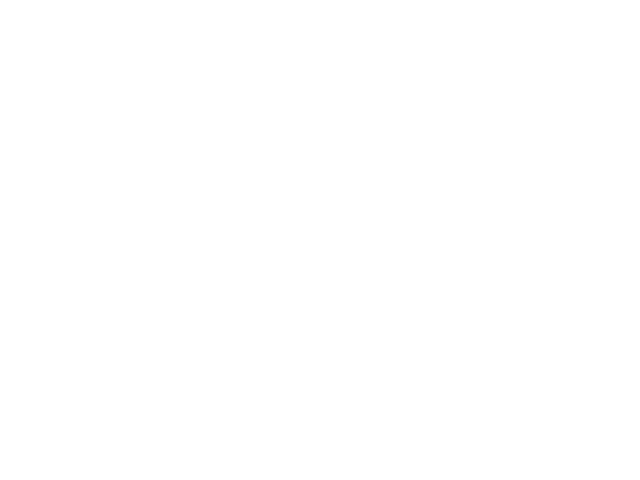

In [4]:
gbTrial = processedDataFrame.groupby('trialNumber')
tempDataFrame = gbTrial.get_group(9)
tempVar = tempDataFrame.gazeError.values
pF.plotMyData_2D(np.array([range(len(tempVar)), tempVar]).T, 'Angular Error', 'AE', 'blue', '.', ['Frames', 'Error'])

In [5]:
plt.close('all')

In [6]:
#rawDataFrame.columns
blankError = processedDataFrame.gazeError.values[rawDataFrame.isBallVisibleQ == 0]
print np.mean(blankError)
print np.std(blankError)

1.89680741826
0.0738253348695


/Users/kamranbinaee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index



In [7]:
processedDataFrame.loc[:,('isBallVisibleQ', '')] = rawDataFrame.isBallVisibleQ.values
#processedDataFrame.loc[:,('preBlankDur', '')] = ''
tempVar1 = np.array([])
tempVar2 = np.array([])
for i in range(len(s1TrialInfo)):
    gbTrial = rawDataFrame.groupby('trialNumber')
    pre = s1TrialInfo.preBlankDur.values[gbTrial.get_group(i).trialNumber.values[0]]
    post = s1TrialInfo.postBlankDur.values[gbTrial.get_group(i).trialNumber.values[0]]
    #print p
    tempVar1 = np.hstack((tempVar1, np.tile(pre, len(gbTrial.get_group(i)))))
    tempVar2 = np.hstack((tempVar2, np.tile(post, len(gbTrial.get_group(i)))))
len(tempVar)
processedDataFrame.loc[:,('preBlankDur', '')] = tempVar1
processedDataFrame.loc[:,('postBlankDur', '')] = tempVar2

In [8]:
#processedDataFrame

In [9]:
df = processedDataFrame.groupby('isBallVisibleQ')
myDataFrame = df.get_group(False)
x = myDataFrame.preBlankDur.values
trace0 = go.Box(
    y= myDataFrame.gazeError.values,
    x=x,
    name='Gaze Error ',
    marker=dict(
        color = 'orange'
        #color='#3D9970'
    ),
    boxmean=True
)
data = [trace0]#, trace1, trace2]
layout = go.Layout(
    title='gaze Error for Different Pre Blank Durations',
    yaxis=dict(
        title='gaze Error [degree]',
        range = [0, 15],
        zeroline=False
    ),
    xaxis=dict(
        title='Pre Blank Duration [s]',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [10]:
df = processedDataFrame.groupby('isBallVisibleQ')
myDataFrame = df.get_group(False)
x = myDataFrame.preBlankDur.values
trace0 = go.Box(
    y= myDataFrame.cycGazeVelocity.values,
    x=x,
    name='Gaze Error ',
    marker=dict(
        color='orange'
    ),
    boxmean = True
)
data = [trace0]#, trace1, trace2]
layout = go.Layout(
    title='gaze Velocity for Different Pre Blank Durations',
    yaxis=dict(
        title='gaze Velocity [degree]',
        range = [0, 200],
        zeroline=False
    ),
    xaxis=dict(
        title='Pre Blank Duration [s]',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [11]:
df = processedDataFrame.groupby('isBallVisibleQ')
myDataFrame = df.get_group(False)
x = myDataFrame.postBlankDur.values
trace0 = go.Box(
    y= myDataFrame.gazeError.values,
    x=x,
    name='Gaze Error ',
    marker=dict(
        color='green'
    ),
    boxmean=True
)
data = [trace0]#, trace1, trace2]
layout = go.Layout(
    title='gaze Error for Different Post Blank Durations',
    yaxis=dict(
        title='gaze Error [degree]',
        range = [0, 15],
        zeroline=False
    ),
    xaxis=dict(
        title='Post Blank Duration [s]',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [12]:
df = processedDataFrame.groupby('isBallVisibleQ')
myDataFrame = df.get_group(False)
x = myDataFrame.postBlankDur.values
trace0 = go.Box(
    y= myDataFrame.cycGazeVelocity.values,
    x=x,
    name='Gaze Error ',
    marker=dict(
        color='green'
    ),
    boxmean=True
)
data = [trace0]#, trace1, trace2]
layout = go.Layout(
    title='gaze Velocity for Different Post Blank Durations',
    yaxis=dict(
        title='gaze Velocity [degree]',
        range = [0, 200],
        zeroline=False
    ),
    xaxis=dict(
        title='Post Blank Duration [s]',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)